# Supervised Learning with Scikit-learn 
# 1. The Iris Flower Dataset

In this notebook, I will apply the concepts learned in DataCamp to the famous Iris Flower Dataset collected by botanist E. S. Anderson and popularized by statistician and biologist Ronald Fisher.

Track: Machine Learning Scientist With Python

Course: Supervised Learning With Scikit-learn

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

A Bunch is similar to a dictionary, in that it contains key-value pairs.

In [2]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


- 'DESCR' = Description of the dataset
- 'feature_names' = a list with only four elements, which serve as column names for the four columns in 'data': 'petal_width', 'petal_length', 'sepal_width', 'sepal_length'
- 'data' = ndarray with 4 columns, containing the numeric values for each of the feature_names.
- 'target_names' = an array of just three values. Index 0 is 'setosa', 1 is 'versicolor' and 2 is 'virginica'.
- 'target' = contains values 0, 1 or 2, indicating the corresponding 'target_name'

In [3]:
X = iris.data
y = iris.target

In [4]:
# Create train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

It is best practice to perform the split so that your split reflects the labels on your data. That is, you want the labels to be distributed in the train and test sets as they are in the original dataset. To achieve this, we use the keyword argument stratify=y, where y is the list or array containing the labels.


In order to implement K-Nearest Neighbors with scikit-learn, we need to take into account the following requirements:

- Features must be continuous, not discrete.
- There can't be missing values
- Data has to be stored in numpy arrays or pandas dataframes

# How to use scikit-learn to fit a classifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# we instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=6)

# we fit the model to the data
knn.fit(X_train, y_train)

# and now we use our model to label the test data
prediction = knn.predict(X_test)

for i,j in zip(prediction, y_test):
    print("Prediction: {}".format(i))
    print("Actual value: {}".format(j))

Prediction: 2
Actual value: 2
Prediction: 1
Actual value: 2
Prediction: 2
Actual value: 2
Prediction: 2
Actual value: 2
Prediction: 1
Actual value: 1
Prediction: 0
Actual value: 0
Prediction: 1
Actual value: 1
Prediction: 0
Actual value: 0
Prediction: 0
Actual value: 0
Prediction: 1
Actual value: 1
Prediction: 0
Actual value: 0
Prediction: 2
Actual value: 2
Prediction: 0
Actual value: 0
Prediction: 2
Actual value: 1
Prediction: 2
Actual value: 2
Prediction: 0
Actual value: 0
Prediction: 0
Actual value: 0
Prediction: 0
Actual value: 0
Prediction: 1
Actual value: 1
Prediction: 0
Actual value: 0
Prediction: 2
Actual value: 2
Prediction: 2
Actual value: 2
Prediction: 2
Actual value: 2
Prediction: 0
Actual value: 0
Prediction: 1
Actual value: 1
Prediction: 1
Actual value: 1
Prediction: 1
Actual value: 1
Prediction: 0
Actual value: 0
Prediction: 0
Actual value: 0
Prediction: 1
Actual value: 1
Prediction: 2
Actual value: 2
Prediction: 2
Actual value: 2
Prediction: 0
Actual value: 0
Prediction

It worked pretty well! But, how well? How much can we trust our model?
# Measuring performance

The accuracy of a model is defined as the fraction of correct predictions. This is included by scikit learn's score() method.

In [6]:
knn.score(X_test, y_test)

0.9555555555555556

### Over and under fitting

Using a small K number tends to result in overfitting (a more complex model that is too sensitive to noise in the specific data that you have, instead of reflecting general trends in the data), while a too large K will result in underfitting. These two images help understand how.

<img src="figure1.png">
<img src="figure2.png">

# 2. The digits dataset

Now let's try with more dimension. Scikit-learn includes a reduced version of the classic MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9.

Datacamp says:

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images']. 

In the original MNIST dataset, the images are 28x28.

First, we import and get to know our data

## Exploring our data


In [7]:
digits = datasets.load_digits()

print(digits.DESCR)
print(digits.keys())

print(digits.images.shape)
print(digits.data.shape)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

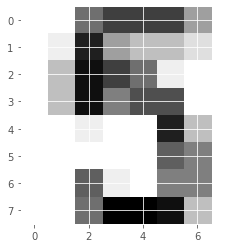

In [8]:
# Print one of the numbers

plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

After creating arrays for the features and target variable, we will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

In [10]:
# Create feature and target arrays
X_digits = digits.data
y_digits = digits.target

# Split into training and test set
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size = 0.2, random_state=42, stratify=y_digits)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train_digits, y_train_digits)

# Print the accuracy
print(knn.score(X_test_digits, y_test_digits))


0.9833333333333333


## Tailor-made models: finding the ideal fit

Not too tight, not too loose, that's exactly how we want it.
